# L'algorithme des k-plus proche voisins (ou *k-NN*)

Ayant au préalable choisi une distance, et étant donné une point de test $x$, l'ensemble des distances des $x_i$ à ce point sont calculées. Les k plus proches de ces points sont alors sélectionnés.

Soit $\mathcal{N}_k(x)$ l'ensemble des k plus proches points à $x$.

La classification s'opère alors par **vote majoritaire** parmi les $k$ voisins:

$$ \hat{y} = \arg\max_{c\in\mathcal{C}} \sum_{(x_i,y_i)\in\mathcal{N}_k(x)} \mathbb{1}_{\{y_i=c\}} $$

Nous pouvons aussi pondérer le vote par la distance en considérant les poids $w_i=\dfrac{1}{d(x,x_i)}$.

La prédiction devient, 
$$ \hat{y} = \arg\max_{c\in\mathcal{C}} \sum_{(x_i,y_i)\in\mathcal{N}_k(x)} w_i\cdot{}\mathbb{1}_{\{y_i=c\}} $$

La régression est le moyenne des classes $y_i$.

La prédicition, dans le cas d'une régression s'écrit donc: $\hat{y}=\frac{1}{k}\sum_{(x_i,y_i)\in\mathcal{N}_k(x)} y_i$

Comme précédemment nous pouvons pondérer cette moyenne par les mêmes poids, et la prédicition devient:
$$\hat{y}=\dfrac{\sum_{(x_i,y_i)\in\mathcal{N}_k(x)} w_i\cdot{}y_i}{\sum_{(x_i,y_i)\in\mathcal{N}_k(x)} w_i}$$


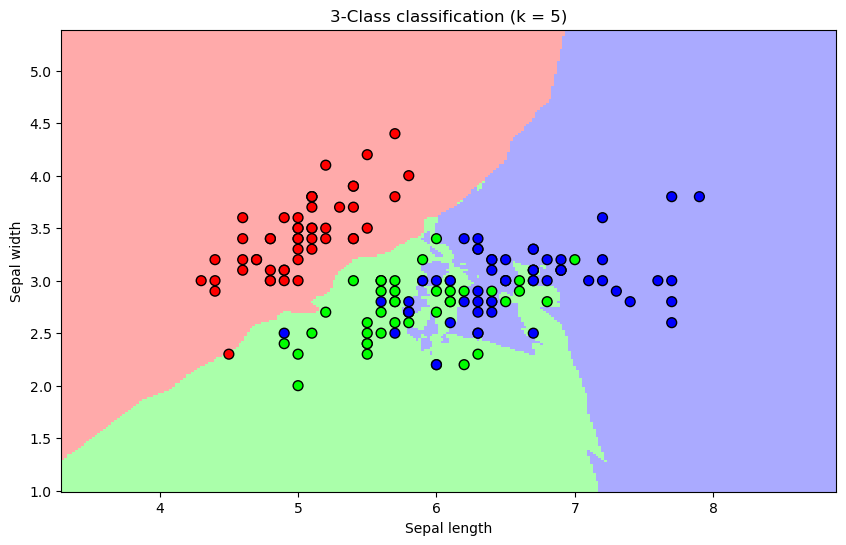

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D visualization
y = iris.target

# Create KNN classifier
k = 5
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)

# Plotting decision boundaries
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f"3-Class classification (k = {k})")
plt.show()
